In [3]:
import matplotlib.pyplot as plt

In [6]:
x = [i for i in range(10)]
print(x)

In [9]:
y = [2*i for i in range(10)]
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Text(0, 0.5, 'vertical')

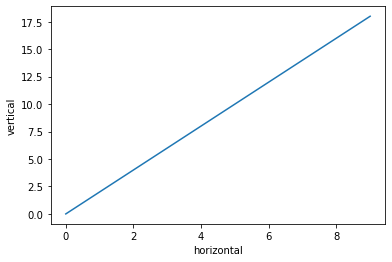

In [13]:
plt.plot(x,y)
plt.xlabel("horizontal")
plt.ylabel("vertical")

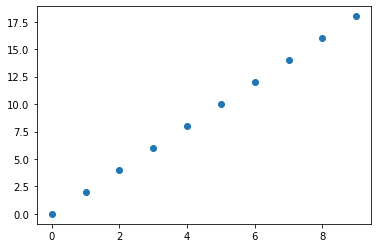

In [15]:
plt.scatter(x,y)

## KNN Classification

In [46]:
# KNN classification
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("car.data")
X = data[[
    "buying", 
    "maint", 
    "safety"
]].values
y = data[["class"]]

#Converting data
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:,i] = Le.fit_transform(X[:,i])

label_mapping = {
    "unacc" : 0,
    "acc" : 1,
    "good" : 2,
    "vgood" : 3
}
y["class"] = y['class'].map(label_mapping)
y = np.array(y)

# Create KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights="uniform")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print(accuracy)

0.7023121387283237


<ipython-input-46-621fb87e1d46>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y['class'].map(label_mapping)
<ipython-input-46-621fb87e1d46>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


## SVM classification

In [65]:
# SVM
# Split data 
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target

classes = ["Iris Setosa", "Iris Versicolour", "Iris Virginica"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = svm.SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acc = metrics.accuracy_score(y_test, prediction)
print("prediction: ", prediction)
print("actual    : ", y_test)
print(acc)

prediction:  [1 0 2 0 0 1 1 1 1 0 2 1 2 0 0 1 0 2 0 0 1 0 2 1 0 1 1 2 1 0]
actual    :  [1 0 2 0 0 1 1 1 1 0 2 1 2 0 0 1 0 2 0 0 1 0 2 1 0 1 1 2 1 0]
1.0


## Linear regression

In [112]:
# linear regression
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm

boston = datasets.load_boston()

#features/label
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#LR
l_reg = linear_model.LinearRegression()
l_reg.fit(X_train,y_train)
prediction = l_reg.predict(X_test)
print("R squared: ", l_reg.score(X_train,y_train))
print("coefficients: ",l_reg.coef_)
print("Intercept: ",l_reg.intercept_)

# statsmodel (on purpose of getting the summary table)
x2 = sm.add_constant(X_train)
models = sm.OLS(y_train,x2)
result = models.fit()
print(result.summary())

R squared:  0.7238051896324769
coefficients:  [-1.17449443e-01  3.31655961e-02  4.82993274e-03  2.70409937e+00
 -1.95655728e+01  4.02542147e+00  9.88424896e-04 -1.49189948e+00
  2.69401657e-01 -8.88909219e-03 -9.74654902e-01  9.85063753e-03
 -5.34508381e-01]
Intercept:  35.74675800186051
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     78.62
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.79e-100
Time:                        11:05:54   Log-Likelihood:                -1210.7
No. Observations:                 404   AIC:                             2449.
Df Residuals:                     390   BIC:                             2506.
Df Model:                          13                                         


## K means clustering

In [165]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

bc = load_breast_cancer()
X = scale(bc.data)
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=6)
model = KMeans(n_clusters=2, random_state=0)
model.fit(X_train)
prediction = model.predict(X_test)
labels = model.labels_
print("Labels: ", labels)
print("Predictions: ", prediction)
print("Actual:      ", y_test)
print("Accuracy: ", accuracy_score(y_test,prediction))
print(pd.crosstab(y_train, labels))

Labels:  [0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 1 0